# 畳み込みニューラルネット

## 概要


Convolutional Neural Network(畳み込みニューラルネット)は略してCNNと呼ばれる。

CNNは一般的な順伝播型のニューラルネットワークとは違い、全結合層だけでなく畳み込み層(Convolution Layer)とプーリング層(Pooling Layer)から構成される

## 処理の流れ
+ **入力層**：入力ベクトル(画像など)を入力する
+ **特徴抽出**：入力ベクトルから、そのベクトルを象徴するようなベクトルに変換する
    + **畳み込み層**
    + **プーリング層**
+ **フラット層**：高次元ベクトルを1次元ベクトルに変更する
+ **全結合層**（中間層）：通常のニューラルネット
+ **出力層**：分類結果を出力する

<img src="./images/CNN_sample.jpg">

引用：https://kenyu-life.com/2019/03/07/convolutional_neural_network/

# 畳み込み層

### 1次元(グレースケール)
<img src="./images/CNN_conv.gif">
引用：https://kenyu-life.com/2019/03/07/convolutional_neural_network/

### 3次元(RGB)
<img src="./images/CNN_conv_3D.gif">
引用：https://kenyu-life.com/2019/03/07/convolutional_neural_network/

### プーリング層

<img src="./images/CNN_pooling.gif">
引用：https://kenyu-life.com/2019/03/07/convolutional_neural_network/

In [ ]:
# CNNで扱う問題

+ 分類：
+ 検出：
+ セグメンテーション：

# 分類

画像に何が書かれているのかを判別する。

MNISTという手書き文字の画像を使用していく。

# 学習データの生成

In [14]:
# 画像データの読み込み
from keras.datasets import mnist
import numpy as np
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
# データの形式
print(
    X_train.shape,
    y_train.shape,
    X_test.shape,
    y_test.shape
)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


# データ確認

In [16]:
# 画像データ
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

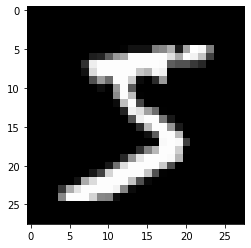

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0],cmap="gray")

In [18]:
# 正解ラベル
y_train[0]

5

# データが大きいので少なくする

In [19]:
# 計算に時間がかかるため、データ量を制限する
X_train = X_train[:15000]/255
X_test = X_test[:2500]/255
y_train = y_train[:15000]
y_test = y_test[:2500]

In [21]:
# CNNに使用するためにデータを変形(グレースケール)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [22]:
# ベクトルからone hotに変換する
import keras
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

# モデル作成

In [23]:
# 必要なライブラリのインポート
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

In [24]:
# 基本モデル作成
model = Sequential()

# 3×3の畳み込み層の追加
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation='relu',
    )
)

# 2×2のmaxプーリング層追加
model.add(
    MaxPooling2D(
        pool_size=(2, 2)
    )
)

# ドロップアウト層の追加
model.add(
    Dropout(0.2)
)

# フラット層の追加
model.add(
    Flatten()
)

# 全結合層の追加
model.add(
    Dense(
        128, 
        activation='relu'
    )
)

# ドロップアウト層の追加
model.add(
    Dropout(0.2)
)

# 出力層
model.add(
    Dense(
        10, 
        activation='softmax'
    )
)

# モデルの学習

In [25]:
# モデルの学習設定
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=optimizers.SGD(lr=0.01),
    metrics=['accuracy']
)

In [26]:
# モデルの学習
result = model.fit(
    X_train,
    y_train,
    batch_size=256,
    epochs=10,
)

Epoch 1/10
15000/15000 [==============================] - 6s 381us/step - loss: 2.2506 - accuracy: 0.2127
Epoch 2/10
15000/15000 [==============================] - 6s 373us/step - loss: 1.9962 - accuracy: 0.5121
Epoch 3/10
15000/15000 [==============================] - 6s 374us/step - loss: 1.4453 - accuracy: 0.6709
Epoch 4/10
15000/15000 [==============================] - 6s 375us/step - loss: 0.9557 - accuracy: 0.7531
Epoch 5/10
15000/15000 [==============================] - 6s 375us/step - loss: 0.7376 - accuracy: 0.7921
Epoch 6/10
15000/15000 [==============================] - 6s 374us/step - loss: 0.6237 - accuracy: 0.8165
Epoch 7/10
15000/15000 [==============================] - 6s 381us/step - loss: 0.5554 - accuracy: 0.8365
Epoch 8/10
15000/15000 [==============================] - 6s 377us/step - loss: 0.5155 - accuracy: 0.8483
Epoch 9/10
15000/15000 [==============================] - 6s 393us/step - loss: 0.4849 - accuracy: 0.8566
Epoch 10/10
15000/15000 [=====================

In [27]:
# モデル結果の出力
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[0.4656474244117737, 0.868399977684021]


# 学習済みモデルの適用（転移学習）

kerasには、すでに学習が済んでいるニューラルネットワークモデルを流用することができる。転移学習といいます。

同じような手法に、fine tuningというものがありますが、こちらは、学習済みモデルの重みを初期値にして、重みのみ再学習するという手法を取ります。

転移学習は、学習済みモデルに、層を追加して、その層について学習します。

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


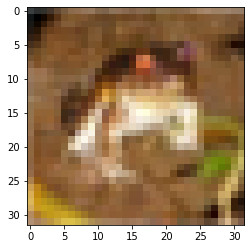

In [14]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# データの形式
print(
    X_train.shape,
    y_train.shape,
    X_test.shape,
    y_test.shape
)

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [15]:
# 計算に時間がかかるため、データ量を制限する
X_train = X_train[:25000]
X_test = X_test[:2500]
y_train = y_train[:25000]
y_test = y_test[:2500]

In [16]:
# ベクトルからone hotに変換する
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [17]:
from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers

# VGG16モデル
img_rows = 32
img_cols = 32
input_tensor = layers.Input(shape=(img_rows, img_cols, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

# 全結合層は自己学習モデル
model_ = Sequential()
model_.add(Flatten(input_shape=vgg16.output_shape[1:]))
model_.add(Dense(256, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))

# VGG16モデルと自己学習モデルの結合
model = models.Model(inputs=vgg16.input, outputs=model_(vgg16.output))

# modelの14層目までのモデル重み
for layer in model.layers[:15]:
    layer.trainable = False

# モデルの学習設定
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.SGD(lr=0.005),
    metrics=['accuracy']
)
0
# モデルの学習
result = model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=100,
)

Epoch 1/100
25000/25000 [==============================] - 669s 27ms/step - loss: 4.2740 - accuracy: 0.1043
Epoch 2/100
25000/25000 [==============================] - 655s 26ms/step - loss: 2.3013 - accuracy: 0.1063
Epoch 3/100
25000/25000 [==============================] - 656s 26ms/step - loss: 2.3001 - accuracy: 0.1042
Epoch 4/100
25000/25000 [==============================] - 657s 26ms/step - loss: 2.3022 - accuracy: 0.1006
Epoch 5/100
25000/25000 [==============================] - 648s 26ms/step - loss: 2.3017 - accuracy: 0.1047
Epoch 6/100
25000/25000 [==============================] - 657s 26ms/step - loss: 2.2988 - accuracy: 0.1088
Epoch 7/100
25000/25000 [==============================] - 657s 26ms/step - loss: 2.3000 - accuracy: 0.1064
Epoch 8/100
25000/25000 [==============================] - 656s 26ms/step - loss: 2.2971 - accuracy: 0.1102
Epoch 9/100
25000/25000 [==============================] - 657s 26ms/step - loss: 2.2907 - accuracy: 0.1192
Epoch 10/100
25000/25000 [==

In [18]:
# モデルの保存
model.save('./model/model_cnn.h5')

In [52]:
# テストデータへの適用
import numpy as np
y_predict = np.argmax(model.predict(X_test),axis=1)

In [63]:
# 正答率の算出
y_test = np.argmax(y_test,axis=1)
acc=np.sum(y_test==y_predict)/len(y_test)
print(acc)

0.7228


# 転移学習を行わなかった場合

In [64]:
# データ読み込み
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 計算に時間がかかるため、データ量を制限する
X_train = X_train[:25000]
X_test = X_test[:2500]
y_train = y_train[:25000]
y_test = y_test[:2500]

# ベクトルからone hotに変換する
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [65]:
# 基本モデル作成
model = Sequential()

# 3×3の畳み込み層の追加
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation='relu',
    )
)

# 2×2のmaxプーリング層追加
model.add(
    MaxPooling2D(
        pool_size=(2, 2)
    )
)

# ドロップアウト層の追加
model.add(
    Dropout(0.2)
)

# フラット層の追加
model.add(
    Flatten()
)

# 全結合層の追加
model.add(
    Dense(
        128, 
        activation='relu'
    )
)

# ドロップアウト層の追加
model.add(
    Dropout(0.2)
)

# 出力層
model.add(
    Dense(
        10, 
        activation='softmax'
    )
)

In [66]:
# モデルの学習設定
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=optimizers.SGD(lr=0.01),
    metrics=['accuracy']
)

In [68]:
# モデルの学習
result = model.fit(
    X_train,
    y_train,
    batch_size=256,
    epochs=100,
)

Epoch 1/100
25000/25000 [==============================] - 15s 592us/step - loss: 2.3053 - accuracy: 0.1013
Epoch 2/100
25000/25000 [==============================] - 14s 557us/step - loss: 2.3029 - accuracy: 0.0973
Epoch 3/100
25000/25000 [==============================] - 13s 523us/step - loss: 2.3028 - accuracy: 0.1001
Epoch 4/100
25000/25000 [==============================] - 13s 531us/step - loss: 2.3027 - accuracy: 0.1002
Epoch 5/100
25000/25000 [==============================] - 13s 532us/step - loss: 2.3024 - accuracy: 0.1013
Epoch 6/100
25000/25000 [==============================] - 14s 564us/step - loss: 2.3024 - accuracy: 0.1012
Epoch 7/100
25000/25000 [==============================] - 13s 529us/step - loss: 2.3021 - accuracy: 0.1019
Epoch 8/100
25000/25000 [==============================] - 13s 531us/step - loss: 2.3021 - accuracy: 0.1018
Epoch 9/100
25000/25000 [==============================] - 13s 533us/step - loss: 2.3020 - accuracy: 0.1020
Epoch 10/100
25000/25000 [==

In [ ]:
# モデル結果の出力
score = model.evaluate(X_test, y_test, verbose=0)
print(score)